In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = "/content/drive/My Drive/Polygence/Audrey/"

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
import json
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [0]:
data = pd.read_csv(root_dir + "/data/all_articles_dependencies.csv")

In [6]:
print(data["Biden_verbs"].iloc[0])

said 3
sparred 1
criticized 1
hit 1
learned 1
implored 1
pointed 1


In [7]:
print(data["Biden_adjectives"].iloc[2])

old 1


In [0]:
names = ["Warren", "Biden", "Sanders", "Buttigieg", "Harris", "Yang"]

In [0]:
def collecting_words(data, name):
  verbs = "\n".join(data[name + "_verbs"][~data[name + "_verbs"].isnull()].tolist())
  adjectives = "\n".join(data[name+"_adjectives"][~data[name + "_adjectives"].isnull()].tolist())
  l_verbs = []
  for word in verbs.split("\n"):
    if word == "":
      continue
    w, c = word.split(" ")
    for i in range(0,int(c)):
      l_verbs.append(w)
  l_adjectives = []
  for word in adjectives.split("\n"):
    if word == "":
      continue
    w, c = word.split(" ")
    for i in range(0,int(c)):
      l_adjectives.append(w)
  df = pd.DataFrame({"word": l_verbs + l_adjectives, "candidate": [name] * (len(l_verbs)+len(l_adjectives)), "pos": ["v"]*len(l_verbs) + ["a"]*len(l_adjectives)})
  return df

## Compare Candidates

In [0]:
all_words = []
for name in names:
  a = collecting_words(data, name)
  all_words.append(a)
concat = pd.concat(all_words)

In [11]:
all_words

[              word candidate pos
 0           impose    Warren   v
 1             said    Warren   v
 2             said    Warren   v
 3         released    Warren   v
 4             seek    Warren   v
 ...            ...       ...  ..
 21247         only    Warren   a
 21248  unflappable    Warren   a
 21249      checked    Warren   a
 21250   democratic    Warren   a
 21251      hopeful    Warren   a
 
 [21252 rows x 3 columns],              word candidate pos
 0            said     Biden   v
 1            said     Biden   v
 2            said     Biden   v
 3         sparred     Biden   v
 4      criticized     Biden   v
 ...           ...       ...  ..
 29399     younger     Biden   a
 29400     younger     Biden   a
 29401     younger     Biden   a
 29402     younger     Biden   a
 29403      former     Biden   a
 
 [29404 rows x 3 columns],             word candidate pos
 0         fended   Sanders   v
 1          wrote   Sanders   v
 2           have   Sanders   v
 3          

In [12]:
concat

,word,candidate,pos
0,impose,Warren,v
1,said,Warren,v
2,said,Warren,v
3,released,Warren,v
4,seek,Warren,v
...,...,...,...
4028,more,Yang,a
4029,reviewed,Yang,a
4030,other,Yang,a
4031,other,Yang,a


In [13]:
connotation = pd.read_csv(root_dir + 'data/annotated_connotation_frames/full_frame_info.txt', sep='\t')
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
  
# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
better : good


In [0]:
def lemmatize(row):
  return lemmatizer.lemmatize(row["word"], pos = row["pos"])

In [0]:
concat["lemma"] = concat.apply(lemmatize, axis=1)

In [16]:
concat

,word,candidate,pos,lemma
0,impose,Warren,v,impose
1,said,Warren,v,say
2,said,Warren,v,say
3,released,Warren,v,release
4,seek,Warren,v,seek
...,...,...,...,...
4028,more,Yang,a,more
4029,reviewed,Yang,a,reviewed
4030,other,Yang,a,other
4031,other,Yang,a,other


In [17]:
connotation.set_index("verb", inplace=True)
connotation

,Perspective(wo),Perspective(ws),Perspective(so),Effect(o),Effect(s),Value(o),Value(s),State(o),State(s),Perspective(ro),Perspective(rs),Perspective(os)
verb,,,,,,,,,,,,
have,0.366667,0.333333,0.466667,0.066667,0.200000,0.466667,0.600000,0.066667,0.366667,0.400000,0.366667,0.066667
say,0.000000,0.166667,0.066667,0.133333,0.066667,0.066667,1.000000,0.000000,0.100000,0.033333,0.266667,0.000000
make,-0.066667,0.100000,0.100000,0.466667,-0.066667,0.200000,1.000000,0.000000,0.166667,-0.033333,0.200000,0.000000
take,0.500000,0.600000,0.800000,0.133333,0.600000,0.466667,0.600000,0.033333,0.666667,0.500000,0.566667,0.066667
go,0.066667,0.133333,0.200000,0.000000,0.066667,-0.066667,0.466667,-0.100000,0.033333,0.066667,0.066667,-0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
breed,-0.366667,-0.500000,0.000000,0.266667,-0.066667,0.066667,0.066667,-0.166667,-0.100000,-0.400000,-0.500000,0.000000
enrich,0.566667,0.533333,0.300000,0.866667,0.266667,1.000000,0.600000,0.433333,0.400000,0.466667,0.433333,0.533333
court,0.266667,0.433333,0.366667,0.400000,0.400000,0.866667,1.000000,0.333333,0.466667,0.333333,0.366667,0.300000


In [0]:
perspective_ws = connotation["Perspective(ws)"].to_dict()
effect_o = connotation["Effect(o)"].to_dict()

In [0]:
concat["perspectives(ws)"] = concat["word"].map(perspective_ws)
concat["effect(o)"] = concat["word"].map(effect_o)

In [20]:
concat

,word,candidate,pos,lemma,perspectives(ws),effect(o)
0,impose,Warren,v,impose,0.066667,0.333333
1,said,Warren,v,say,NaN,NaN
2,said,Warren,v,say,NaN,NaN
3,released,Warren,v,release,NaN,NaN
4,seek,Warren,v,seek,0.333333,0.266667
...,...,...,...,...,...,...
4028,more,Yang,a,more,NaN,NaN
4029,reviewed,Yang,a,reviewed,NaN,NaN
4030,other,Yang,a,other,NaN,NaN
4031,other,Yang,a,other,NaN,NaN


In [0]:
def filter_data(data, pos, colname):
  return data[(data["pos"] == pos) & ~data[colname].isnull()]

In [0]:
def plot(data, pos, colname, ylim1, ylim2):
  sns.barplot(data=filter_data(data, pos, colname), x="candidate", y=colname)
  plt.ylim(ylim1, ylim2)

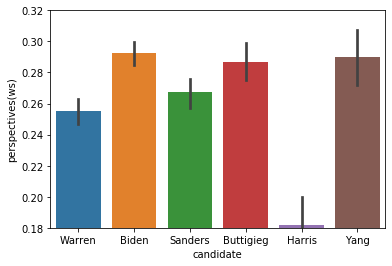

In [23]:
plot(concat, "v", "perspectives(ws)", 0.18, 0.32)
#plt.xlim("Warren", "Biden", "Sanders")

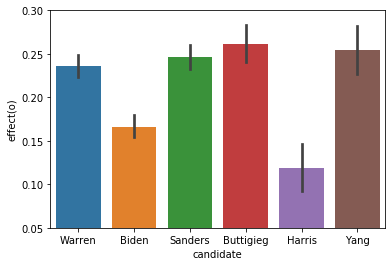

In [24]:
plot(concat, "v", "effect(o)", 0.05, 0.3)

In [25]:
poweragency = pd.read_csv(root_dir + 'data/agency_power.csv', sep=',')
poweragency

,verb,agency,power
0,abandons,agency_pos,power_agent
1,abolishes,agency_pos,power_agent
2,absorbs,agency_pos,power_agent
3,abuses,agency_pos,power_agent
4,accelerates,agency_pos,power_agent
...,...,...,...
2150,yelps,agency_pos,NaN
2151,yields,agency_equal,power_agent
2152,zaps,agency_pos,power_agent
2153,zips,agency_pos,NaN


In [0]:
replace_agency = {
    "agency_pos": 1,
    "agency_neg": -1,
    "agency_equal": 0
}

replace_power = {
    "power_agent": 1,
    "power_theme": -1,
    "power_equal": 0
}

In [27]:
poweragency["agency"] = poweragency["agency"].map(replace_agency)
poweragency["power"] = poweragency["power"].map(replace_power)
poweragency["lemma"] = poweragency["verb"].apply(lambda x: lemmatizer.lemmatize(x, pos="v"))
poweragency


,verb,agency,power,lemma
0,abandons,1.0,1.0,abandon
1,abolishes,1.0,1.0,abolish
2,absorbs,1.0,1.0,absorb
3,abuses,1.0,1.0,abuse
4,accelerates,1.0,1.0,accelerate
...,...,...,...,...
2150,yelps,1.0,NaN,yelp
2151,yields,0.0,1.0,yield
2152,zaps,1.0,1.0,zap
2153,zips,1.0,NaN,zip


In [0]:
poweragency.set_index("lemma", inplace=True)

power = poweragency["power"].to_dict()
agency = poweragency["agency"].to_dict()

In [29]:
power


{'abandon': 1.0,
 'abolish': 1.0,
 'absorb': 1.0,
 'abuse': 1.0,
 'accelerate': 1.0,
 'accept': 1.0,
 'access': 1.0,
 'accommodate': 0.0,
 'accompany': -1.0,
 'accomplish': 0.0,
 'accord': 1.0,
 'account': 1.0,
 'accumulate': 1.0,
 'accuse': 1.0,
 'ache': nan,
 'achieve': -1.0,
 'acknowledge': 1.0,
 'acquaint': 1.0,
 'acquire': 1.0,
 'acquit': 1.0,
 'activate': 1.0,
 'act': nan,
 'adapt': 1.0,
 'address': 0.0,
 'add': 1.0,
 'adjoin': 1.0,
 'adjust': 1.0,
 'administer': 1.0,
 'admire': -1.0,
 'admit': -1.0,
 'adopt': 1.0,
 'adore': -1.0,
 'adorn': -1.0,
 'advance': 1.0,
 'advertise': 1.0,
 'advise': 1.0,
 'advocate': 0.0,
 'affect': 1.0,
 'affirm': 1.0,
 'affix': 1.0,
 'afford': 1.0,
 'age': nan,
 'aggravate': -1.0,
 'agonize': nan,
 'agonizes over': -1.0,
 'agree': nan,
 'agrees on': 0.0,
 'aid': 1.0,
 'aim': 0.0,
 'alarm': 1.0,
 'alert': 1.0,
 'allege': 1.0,
 'allow': 1.0,
 'alter': 1.0,
 'amble': nan,
 'amend': 1.0,
 'amuse': -1.0,
 'analyze': 0.0,
 'anchor': 1.0,
 'anger': 0.0,
 'an

In [0]:
concat["power"] = concat["lemma"].map(power)
concat["agency"] = concat["lemma"].map(agency)

In [31]:
concat

,word,candidate,pos,lemma,perspectives(ws),effect(o),power,agency
0,impose,Warren,v,impose,0.066667,0.333333,1.0,1.0
1,said,Warren,v,say,NaN,NaN,0.0,1.0
2,said,Warren,v,say,NaN,NaN,0.0,1.0
3,released,Warren,v,release,NaN,NaN,1.0,1.0
4,seek,Warren,v,seek,0.333333,0.266667,-1.0,1.0
...,...,...,...,...,...,...,...,...
4028,more,Yang,a,more,NaN,NaN,NaN,NaN
4029,reviewed,Yang,a,reviewed,NaN,NaN,NaN,NaN
4030,other,Yang,a,other,NaN,NaN,NaN,NaN
4031,other,Yang,a,other,NaN,NaN,NaN,NaN


In [32]:
vad = pd.read_csv(root_dir + 'data/NRC-VAD-Lexicon.txt', sep='\t')
vad

,Word,Valence,Arousal,Dominance
0,aaaaaaah,0.479,0.606,0.291
1,aaaah,0.520,0.636,0.282
2,aardvark,0.427,0.490,0.437
3,aback,0.385,0.407,0.288
4,abacus,0.510,0.276,0.485
...,...,...,...,...
20002,zoo,0.760,0.520,0.580
20003,zoological,0.667,0.458,0.492
20004,zoology,0.568,0.347,0.509
20005,zoom,0.490,0.520,0.462


In [0]:
vad.set_index("Word", inplace=True)
valence = vad["Valence"].to_dict()
arousal = vad["Arousal"].to_dict()
dominance = vad["Dominance"].to_dict()

In [0]:
concat["valence"] = concat["word"].map(valence)
concat["arousal"] = concat["word"].map(arousal)
concat["dominance"] = concat["word"].map(dominance)

In [35]:
concat

,word,candidate,pos,lemma,perspectives(ws),effect(o),power,agency,valence,arousal,dominance
0,impose,Warren,v,impose,0.066667,0.333333,1.0,1.0,0.503,0.721,0.745
1,said,Warren,v,say,NaN,NaN,0.0,1.0,NaN,NaN,NaN
2,said,Warren,v,say,NaN,NaN,0.0,1.0,NaN,NaN,NaN
3,released,Warren,v,release,NaN,NaN,1.0,1.0,0.844,0.490,0.651
4,seek,Warren,v,seek,0.333333,0.266667,-1.0,1.0,0.622,0.429,0.482
...,...,...,...,...,...,...,...,...,...,...,...
4028,more,Yang,a,more,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4029,reviewed,Yang,a,reviewed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4030,other,Yang,a,other,NaN,NaN,NaN,NaN,0.472,0.230,0.259
4031,other,Yang,a,other,NaN,NaN,NaN,NaN,0.472,0.230,0.259


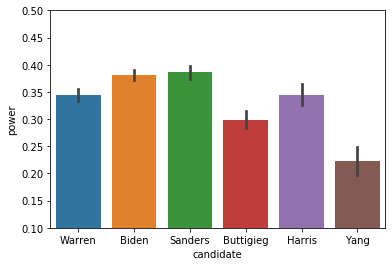

In [36]:
plot(concat, "v", "power", 0.1, 0.5)

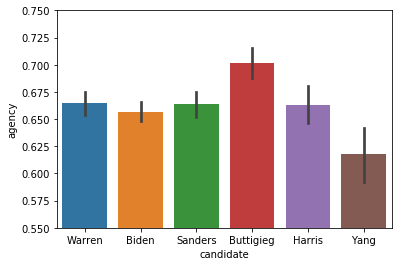

In [37]:
plot(concat, "v", "agency", 0.55, 0.75)

## Compare Sources

In [0]:
leaning_to_source = {"left":["cnn", "msnbc", "new-york-magazine", "the-new-york-times"], 
           "lean_left":["abc-news", "axios", "cbs-news", "nbc-news", "newsweek", "politico", "the-washington-post", "time", "vice-news"],
           "center":["al-jazeera-english", "associated-press", "reuters", "usa-today"],
           "lean_right":["fox-news", "the-american-conservative", "the-hill"],
           "right":["breitbart-news", "national-review"]}
source_to_leaning = {}
for key in leaning_to_source:
  for source in leaning_to_source[key]:
    source_to_leaning[source] = key


In [39]:
source_to_leaning

{'abc-news': 'lean_left',
 'al-jazeera-english': 'center',
 'associated-press': 'center',
 'axios': 'lean_left',
 'breitbart-news': 'right',
 'cbs-news': 'lean_left',
 'cnn': 'left',
 'fox-news': 'lean_right',
 'msnbc': 'left',
 'national-review': 'right',
 'nbc-news': 'lean_left',
 'new-york-magazine': 'left',
 'newsweek': 'lean_left',
 'politico': 'lean_left',
 'reuters': 'center',
 'the-american-conservative': 'lean_right',
 'the-hill': 'lean_right',
 'the-new-york-times': 'left',
 'the-washington-post': 'lean_left',
 'time': 'lean_left',
 'usa-today': 'center',
 'vice-news': 'lean_left'}

In [0]:
all_words = []
for source, chunk in data.groupby("source"):
  for name in names:
    a = collecting_words(chunk, name)
    a["source"] = source
    all_words.append(a)
concat_sources = pd.concat(all_words)

In [0]:
concat_sources["leaning"] = concat_sources["source"].map(source_to_leaning)

In [42]:
concat_sources

,word,candidate,pos,source,leaning
0,impose,Warren,v,abc-news,lean_left
1,said,Warren,v,abc-news,lean_left
2,said,Warren,v,abc-news,lean_left
3,released,Warren,v,abc-news,lean_left
4,seek,Warren,v,abc-news,lean_left
...,...,...,...,...,...
60,went,Yang,v,vice-news,lean_left
61,believes,Yang,v,vice-news,lean_left
62,advocated,Yang,v,vice-news,lean_left
63,was,Yang,v,vice-news,lean_left


In [43]:
concat_sources["lemma"] = concat_sources.apply(lemmatize, axis=1)
concat_sources

,word,candidate,pos,source,leaning,lemma
0,impose,Warren,v,abc-news,lean_left,impose
1,said,Warren,v,abc-news,lean_left,say
2,said,Warren,v,abc-news,lean_left,say
3,released,Warren,v,abc-news,lean_left,release
4,seek,Warren,v,abc-news,lean_left,seek
...,...,...,...,...,...,...
60,went,Yang,v,vice-news,lean_left,go
61,believes,Yang,v,vice-news,lean_left,believe
62,advocated,Yang,v,vice-news,lean_left,advocate
63,was,Yang,v,vice-news,lean_left,be


In [0]:
concat_sources["perspectives(ws)"] = concat_sources["lemma"].map(perspective_ws)
concat_sources["effect(o)"] = concat_sources["lemma"].map(effect_o)

In [45]:
concat_sources

,word,candidate,pos,source,leaning,lemma,perspectives(ws),effect(o)
0,impose,Warren,v,abc-news,lean_left,impose,0.066667,0.333333
1,said,Warren,v,abc-news,lean_left,say,0.166667,0.133333
2,said,Warren,v,abc-news,lean_left,say,0.166667,0.133333
3,released,Warren,v,abc-news,lean_left,release,0.200000,0.533333
4,seek,Warren,v,abc-news,lean_left,seek,0.333333,0.266667
...,...,...,...,...,...,...,...,...
60,went,Yang,v,vice-news,lean_left,go,0.133333,0.000000
61,believes,Yang,v,vice-news,lean_left,believe,0.233333,0.733333
62,advocated,Yang,v,vice-news,lean_left,advocate,0.400000,0.600000
63,was,Yang,v,vice-news,lean_left,be,NaN,NaN


In [46]:
len(concat)

89654

In [47]:
len(concat_sources)

89654

In [48]:
len(data)

12600

In [49]:
concat_sources["leaning"].value_counts()

lean_left     37359
lean_right    19313
left          13688
center        11120
right          8068
Name: leaning, dtype: int64

In [0]:
def plot_leaning(data, pos, colname, ylim1, ylim2):
  sns.barplot(data=filter_data(data, pos, colname), x="leaning", hue="candidate", y=colname, order=["left", "lean_left", "center", "lean_right", "right"])
  plt.ylim(ylim1, ylim2)

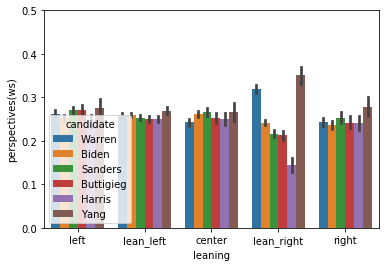

In [51]:
plot_leaning(concat_sources, "v", "perspectives(ws)", 0, 0.5)

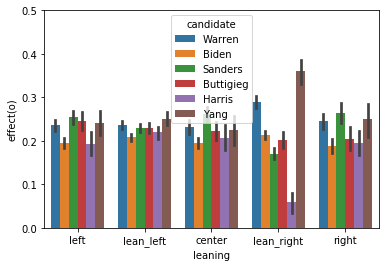

In [52]:
plot_leaning(concat_sources, "v", "effect(o)", 0, 0.5)

In [0]:
concat_sources["power"] = concat_sources["lemma"].map(power)
concat_sources["agency"] = concat_sources["lemma"].map(agency)

In [54]:
concat_sources

,word,candidate,pos,source,leaning,lemma,perspectives(ws),effect(o),power,agency
0,impose,Warren,v,abc-news,lean_left,impose,0.066667,0.333333,1.0,1.0
1,said,Warren,v,abc-news,lean_left,say,0.166667,0.133333,0.0,1.0
2,said,Warren,v,abc-news,lean_left,say,0.166667,0.133333,0.0,1.0
3,released,Warren,v,abc-news,lean_left,release,0.200000,0.533333,1.0,1.0
4,seek,Warren,v,abc-news,lean_left,seek,0.333333,0.266667,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
60,went,Yang,v,vice-news,lean_left,go,0.133333,0.000000,NaN,0.0
61,believes,Yang,v,vice-news,lean_left,believe,0.233333,0.733333,-1.0,-1.0
62,advocated,Yang,v,vice-news,lean_left,advocate,0.400000,0.600000,0.0,1.0
63,was,Yang,v,vice-news,lean_left,be,NaN,NaN,NaN,NaN


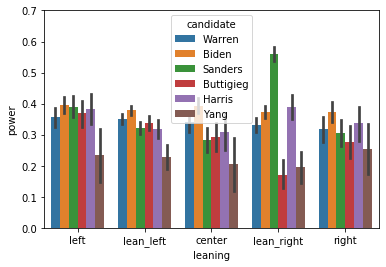

In [55]:
plot_leaning(concat_sources, "v", "power", 0, 0.7)

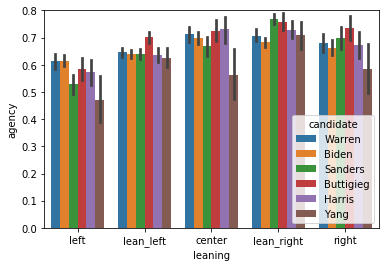

In [56]:
plot_leaning(concat_sources, "v", "agency", 0, 0.8)

In [0]:
concat_sources["valence"] = concat_sources["word"].map(valence)
concat_sources["arousal"] = concat_sources["word"].map(arousal)
concat_sources["dominance"] = concat_sources["word"].map(dominance)

In [58]:
concat_sources

,word,candidate,pos,source,leaning,lemma,perspectives(ws),effect(o),power,agency,valence,arousal,dominance
0,impose,Warren,v,abc-news,lean_left,impose,0.066667,0.333333,1.0,1.0,0.503,0.721,0.745
1,said,Warren,v,abc-news,lean_left,say,0.166667,0.133333,0.0,1.0,NaN,NaN,NaN
2,said,Warren,v,abc-news,lean_left,say,0.166667,0.133333,0.0,1.0,NaN,NaN,NaN
3,released,Warren,v,abc-news,lean_left,release,0.200000,0.533333,1.0,1.0,0.844,0.490,0.651
4,seek,Warren,v,abc-news,lean_left,seek,0.333333,0.266667,-1.0,1.0,0.622,0.429,0.482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,went,Yang,v,vice-news,lean_left,go,0.133333,0.000000,NaN,0.0,NaN,NaN,NaN
61,believes,Yang,v,vice-news,lean_left,believe,0.233333,0.733333,-1.0,-1.0,NaN,NaN,NaN
62,advocated,Yang,v,vice-news,lean_left,advocate,0.400000,0.600000,0.0,1.0,NaN,NaN,NaN
63,was,Yang,v,vice-news,lean_left,be,NaN,NaN,NaN,NaN,NaN,NaN,NaN


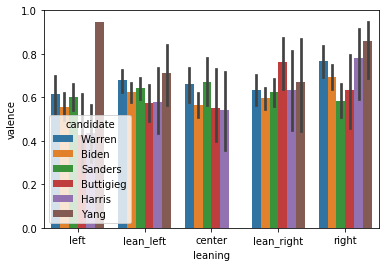

In [62]:
plot_leaning(concat_sources, "a", "valence", 0, 1)

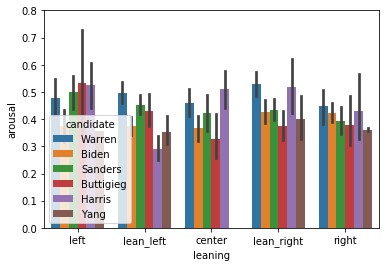

In [60]:
plot_leaning(concat_sources, "a", "arousal", 0, 0.8)

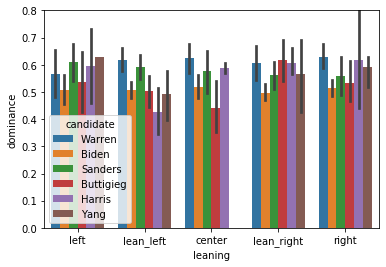

In [61]:
plot_leaning(concat_sources, "a", "dominance", 0, 0.8)